# Economic Market Prediction [Hands on Azure AutoML]
  

# Abstract:  
__Lately, Machine Learning has become inevitable method of data analysis. It is used every day to make critical decisions in stock trading, medical diagnosis, energy load forecasting, and more. However, sometimes it gets difficult for non-expert to design a flawless model. The goal of this Project is to Develop the Automated Machine Learning model so that it can be used by economist to analyze.__ 

__AutoML__ : Automated machine learning (AutoML) is the process of automating the process of applying machine learning to real-world problems. AutoML covers the complete pipeline from the raw dataset to the deployable machine learning model.The high degree of automation in AutoML allows non-experts to make use of machine learning models and techniques without requiring to become an expert in this field first.

Data scientists, analysts, and developers across industries can use automated ML to:
- Implement ML solutions without extensive programming knowledge<br>
- Save time and resources<br>
- Leverage data science best practices<br>
- Provide agile problem-solving<br>

__Target of AutoML is to automate the following stages:__ 
>1. Data preparation<br>
>2. Feature engineering<br>
>3. Model selection<br>
>4. Selection of evaluation metrics<br> 
>5. Hyperparameter optimization<br>

__Data preparation:__ 
Data preparation process consists of Handling missing data, Scaling or Normalising the data, Converting text to numeric values(dummy variables) to help algorithms perform well.


__Feature engineering:__ Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. The feature engineering process contains 
- Feature selection 
- Feature extraction 
- Meta learning and transfer learning
- Detection and handling of skewed data<br>

__Model selection:__ It is the task of selecting a statistical model from a set of candidate models, given data. 

__Hyperparameter optimization__: It finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data

__Pipeline Architecture:__


![title](Images/pipeline.png)

# Azure AutoML:  
Azure AutoML allows to build ML models with high scale, efficiency, and productivity all while sustaining model quality.<br> 
In this Project, Automated machine learning from Azure Machine Learning is used to create a regression model to predict S&P500 data. This process accepts training data and configuration settings, and automatically iterates through combinations of different feature normalization/standardization methods, models, and hyperparameter settings to arrive at the best model.

__Steps for Automated ML training experiments__:
> 1. Identify the ML problem to be solved: classification, forecasting, or regression
> 2. Choose whether you want to use the __Python SDK__ or the __Studio web experience__
> 3. Specify the source and format of the labeled training data: Numpy arrays or Pandas dataframe
> 4. Configure the compute target for model training: local computer, Azure Machine Learning Computes, remote VMs, or Azure Databricks. 
> 5. Configure the automated machine learning parameters that determine how many iterations over different models, hyperparameter settings, advanced preprocessing/featurization, and what metrics to look at when determining the best model.
> 6. Submit the training run.
> 7. Review the results



<center>
    <img src="Images/autoML.png" />
</center>

## __Environment specification:__<br>


__To intall AzureML__ use the following command:<br>
*pip install azureml-sdk[notebooks,automl]*




# Model :

To Check whether azureml is properly installed or not, Use following command:

In [2]:
import azureml.core
print("Current version of the Azure ML SDK is ", azureml.core.VERSION)

Current version of the Azure ML SDK is  1.2.0


### Creating WorkSpace: 

In [3]:
from azureml.core import Workspace

subscription_id = '<Subsription ID>' ## Provide your Subsription ID
resource_group  = '<resource_group>'      ## Provide your resource_group                           
workspace_name  = '<workspace_name>' ## Provide your workspace_name


try:
    ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
    ws.write_config()
    print('Library configuration succeeded\n')
    print('WorkSpace name: ',ws.name,'\nlocation: \t', ws.location,'\nresource_group: ', ws.resource_group)
except:
    print('Workspace not found')

Library configuration succeeded

WorkSpace name:  ADS_Project 
location: 	 eastus2 
resource_group:  automl


__In this project, I used Local python SDK to develop automl model.__ <br>
__Following Code could create compute on azure to store, and train our model. However, it's not necessary to create a virtual environment.__


'''from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

__Choose a name for your cluster.__
amlcompute_cluster_name = "hardware-cluster"

__Verify that cluster does not exist already__
try:
    compute_target = ComputeTarget(workspace=ws, name=amlcompute_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                           max_nodes=4)
    compute_target = ComputeTarget.create(ws, amlcompute_cluster_name, compute_config)

compute_target.wait_for_completion(show_output=True)'''

### Import Libraries:

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

__Loading dataset from Local Machine:__

In [7]:
sp500=pd.read_csv("EconomicData/s&p500.csv",header=0, index_col=0, parse_dates=True, squeeze=True)

In [10]:
sp500.head()

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1881-01-01,6.19,0.27,0.49,9.42,3.70,164.18,7.03,12.89,18.47
1881-02-01,6.17,0.27,0.48,9.51,3.69,162.01,7.09,12.65,18.15
1881-03-01,6.24,0.28,0.48,9.51,3.69,163.85,7.22,12.54,18.27
1881-04-01,6.22,0.28,0.47,9.61,3.68,161.71,7.28,12.31,17.95
1881-05-01,6.50,0.28,0.47,9.51,3.67,170.68,7.48,12.32,18.87


In [8]:
sp500.isnull().sum()

SP500                   0
Dividend                1
Earnings                4
Consumer Price Index    0
Long Interest Rate      0
Real Price              0
Real Dividend           1
Real Earnings           4
PE10                    0
dtype: int64

__As you can see, Dataset contains Null values. Also, Data is not in normalized form.<br>
AutoML itself handle data cleaning process so we don't need to worry about it.__

### Training and Test Data for AutoML experiment:
Spliting of data into Training and Testing 

In [11]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(sp500, test_size=0.1, random_state=42)
label = "SP500"

### Model Configuration: 
Instantiate an AutoMLConfig object to specify the settings and data used to run the experiment.


In [12]:
from azureml.train.automl import AutoMLConfig

automl_regressor = AutoMLConfig(
   task='regression',
   experiment_timeout_minutes=30,
   primary_metric='r2_score',
   training_data=train_data,
   label_column_name=label,
   n_cross_validations=5)



Task: classification/regression/forecasting <br>
experiment_timeout_minutes: 30 min (model will run for )
Primary metric is the metric that you want to optimize.<br>
Regression supports the following primary metrics: spearman_correlation / normalized_root_mean_squared_error / r2_score<br>

whitelist[]: List of machine learning Models which will be __Included__ for training<br>
blacklist[]: List of machine learning Models which will be __Excluded__ From training<br>
If None is mentioned, then model will include all the models which are availble.<br>

Training_data: Independent variables <br>
Label_column_name: Dependent variable coulmn name <br>
n_cross_validations: Number of cross validation splits.

 ### Creating Experiment:

In [14]:
from azureml.core.experiment import Experiment
experiment = Experiment(workspace=ws, name='exp3')

Call the submit method on the experiment object and pass the run configuration. Execution of local runs is synchronous. Depending on the data and the number of iterations this can run for a while. In this example, we specify show_output = True to print currently running iterations to the console.

In [15]:
remote_run = experiment.submit(automl_regressor, show_output = True)

Running on local machine
Parent Run ID: AutoML_27328928-d2b2-468c-81d7-57e22d39498f

Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Missing values imputation
STATUS:       FIXED
DESCRIPTION:  The training data had the following missing values which were resolved. Please review your data source for data quality issues and possibly filter out the rows with these missing values. If the missing values are expected, you can either accept the above imputation, or implement your own custom

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_27328928-d2b2-468c-81d7-57e22d39498f_14/outputs/scoring_file_v_1_0_0.py?sv=2019-02-02&sr=b&sig=S7OfHmyWVdmYsEsFg1%2B4UdbF9chIuuzNq%2BD5Vq4qLkY%3D&st=2020-04-24T18%3A20%3A05Z&se=2020-04-25T18%3A30%3A05Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D&timeout=30


StandardScalerWrapper LassoLars                0:00:38       0.9921    0.9952
        15   MaxAbsScaler RandomForest                      0:00:19       0.9759    0.9952
        16   StandardScalerWrapper LightGBM                 0:02:46       0.9944    0.9952
        17   RobustScaler ElasticNet                        0:00:22       0.9918    0.9952
        18   MinMaxScaler ExtremeRandomTrees                0:00:23       0.9899    0.9952
        19   MinMaxScaler GradientBoosting                  0:00:28       0.9924    0.9952
        20   SparseNormalizer ExtremeRandomTrees            0:00:29       0.8721    0.9952
        21   MaxAbsScaler SGD                               0:00:17       0.9683    0.9952
        22   

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_27328928-d2b2-468c-81d7-57e22d39498f_22/outputs/model.pkl?sv=2019-02-02&sr=b&sig=2s5bx2ce6TjDK23FBwh5ozHfxT6Ce5xVGMHN3KrghBo%3D&st=2020-04-24T18%3A25%3A52Z&se=2020-04-25T18%3A35%3A52Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D&timeout=30


StandardScalerWrapper ElasticNet               0:00:37       0.9921    0.9952
        23   StandardScalerWrapper ElasticNet               0:00:18       0.9920    0.9952
        24   StandardScalerWrapper ElasticNet               0:00:24       0.9921    0.9952
        25   StandardScalerWrapper LightGBM                 0:00:25       0.9784    0.9952
        26   MaxAbsScaler SGD                               0:00:18       0.9664    0.9952
        27   MinMaxScaler ExtremeRandomTrees                0:00:39       0.9912    0.9952
        28   StandardScalerWrapper ElasticNet               0:00:18       0.9921    0.9952
        29   MaxAbsScaler RandomForest                      0:00:18       0.9754    0.9952
        30   TruncatedSVDWrapper LightGBM                   0:00:23       0.9973    0.9973
        31   StandardScalerWrapper RandomForest             0:00:23       0.9368    0.9973
        32   StandardScalerWrapper LassoLars                0:00:19       0.9921    0.9973
        33  

WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))': /azureml/ExperimentRun/dcid.AutoML_27328928-d2b2-468c-81d7-57e22d39498f_55/outputs/pipeline_graph.json?sv=2019-02-02&sr=b&sig=P108bFyQDxj7N8rlqY%2FXjQrP%2BM3zefjpbeztPWB8PPU%3D&st=2020-04-24T18%3A41%3A22Z&se=2020-04-25T18%3A51%3A22Z&sp=rcw&comp=block&blockid=TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQXdNREF3TURBd01EQSUzRA%3D%3D&timeout=30


MaxAbsScaler LightGBM                          0:00:39       0.9957    0.9975
        56   StandardScalerWrapper ExtremeRandomTrees       0:00:29       0.9899    0.9975
        57   MaxAbsScaler ExtremeRandomTrees                0:00:28       0.9856    0.9975
        58   VotingEnsemble                                 0:01:38       0.9985    0.9985
        59   StackEnsemble                                  0:01:25       0.9975    0.9985
Stopping criteria reached at iteration 60. Ending experiment.
****************************************************************************************************
Current status: BestRunExplainModel. Best run model explanations started
Current status: ModelExplanationDataSetSetup. Model explanations data setup completed
Current status: EngineeredFeatureExplanations. Computation of engineered features started
Current status: EngineeredFeatureExplanations. Computation of engineered features completed
Current status: BestRunExplainModel. Best run model ex

__From the above result, We can see that our Automl model__
> __Imputed missing values.<br>
> Used Normalization and Standardization method.<br>
> Created a Data Pipeline. <br>
> Performed feature extraction Hyper-parameter optimization.<br>
> Used loss function on pipeline to compute score.__<br>

### Widget for Monitoring Runs:

In [21]:
from azureml.widgets import RunDetails
RunDetails(remote_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

It may happened that above widget will not work unless we run it agian. Hence, following are some snippets got from this widget. 

Actual Widget: 

<center>
    <img src="Images/widget1.png" />
</center>

MAE :

<center>
    <img src="Images/widget_mae.png" />
</center>

Explained Variance:

<right>
    <img src="Images/widget_Var.png"/>
</right>

__Ensemble models:__
Automated machine learning supports ensemble models, which are enabled by default. Ensemble learning improves machine learning results and predictive performance by combining multiple models as opposed to using single models. The ensemble iterations appear as the final iterations of your run. Automated machine learning uses both voting and stacking ensemble methods for combining models:

__Voting:__ predicts based on the weighted average of predicted class probabilities (for classification tasks) or predicted regression targets (for regression tasks). <br>
__Stacking:__ stacking combines heterogenous models and trains a meta-model based on the output from the individual models. The current default meta-models are LogisticRegression for classification tasks and ElasticNet for regression/forecasting tasks

### To check which is the best model amongs the others:

In [18]:
best_run, fitted_model = remote_run.get_output()
print(best_run)
print("***")
print(fitted_model)

Run(Experiment: exp3,
Id: AutoML_27328928-d2b2-468c-81d7-57e22d39498f_58,
Type: None,
Status: Completed)
***
RegressionPipeline(pipeline=Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(enable_dnn=None, enable_feature_sweeping=None,
        feature_sweeping_config=None, feature_sweeping_timeout=None,
        featurization_config=None, force_text_dnn=None,
        is_cross_validation=None, is_onnx_compatible=None, logger=None,
        obser...666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]))]),
          stddev=None)


 __Voting emsemble__ is the best model amongs other for the given problem. <br>
 __model accuracy__ is __99.84%__  calculated by primary_metric: *r2_score*

Run the following cell to access previous runs. Uncomment the cell below and update the run_id.

In [22]:
#from azureml.train.automl.run import AutoMLRun
#remote_run = AutoMLRun(experiment=exp3, run_id='<run_ID_goes_here')
#remote_run

__Feature Importance from Azure API for the best model:__

<center>
    <img src="Images/feature.png" />
</center>

### Prediction & Validation: 

In [23]:
test_y = test_data['SP500'].fillna(0)
test_data = test_data.drop('SP500', 1)
test_data = test_data.fillna(0)

train_y = train_data['SP500'].fillna(0)
train_data = train_data.drop('SP500', 1)
train_data = train_data.fillna(0)

### Prediction:

In [45]:
## Prediction on Training & Testing Data
pred_train_y = fitted_model.predict(train_data)
pred_test_y = fitted_model.predict(test_data)

### Residuals:

In [27]:
## Calculating Residual
residual_train_y = train_y - pred_train_y
residual_test_y = test_y - pred_test_y

### Visualization:

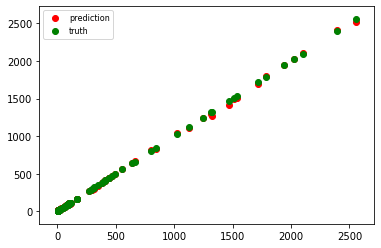

In [31]:
## Ploting Residual
test_pred = plt.scatter(test_y, pred_test_y, color='r')
test_test = plt.scatter(test_y, test_y, color='g')
plt.legend((test_pred, test_test), ('prediction', 'truth'), loc='upper left', fontsize=8)
plt.show()

__RMSE__ is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation. It should be more useful when large errors are particularly undesirable.<br>
Lower values of RMSE indicate better fit

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

actual_y = test_y.values.flatten().tolist()
rmse = sqrt(mean_squared_error(actual_y, pred_test_y))
rmse

9.338669170631627

RMSE for the __Voting Ensemble__ model is 9.33 on the test data.

 In general, a lower RMSD is better than a higher one. However, comparisons across different types of data would be invalid because the measure is dependent on the scale of the numbers used.

# Conclusion:
In this Project, we have successfully automated the machine learning process with the help of Azure AutoML. <br>
So far, using Azure AutoML we have : <br>
> Built resilient model which can directly deploy at client side.<br>
> Reduced time required to build the model by about 70%<br>
> Created a data pipeline. <br>
> Achieved 99.7% model accuracy for Voting Ensemble learning algorithm.<br>
> Visualized True vs Prdicted value difference.

# Author:
Pranav Khiste( NUID : 001057866 )<br>
Information Systems<br>
Northeastern University<br>

# Citation:
References:<br>
https://en.wikipedia.org/wiki/Automated_machine_learning <br>
https://docs.microsoft.com/en-us/azure/machine-learning/how-to-use-automated-ml-for-ml-models <br>

# Licensing
Copyright 2020 Pranav Sanjay Khiste

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.